In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

In [2]:
imgs_path = "/".join(os.getcwd().split("/")[:-1]) + "/docs/img/"
imgs_path

'/home/samoed/Desktop/ESGanalysis/docs/img/'

# Reviews count

In [3]:
params = {
    "start_date": "1970-01-01",
    "end_date": "2023-05-10",
    "source_sites": ["banki.ru", "sravni.ru", "vk.com/comments"],
    "aggregate_by": "month",
}

response = requests.get("https://ai-service.ethics-hse.ru/views/reviews_count", params=params)
response

<Response [200]>

In [4]:
response.text

'{"items":[{"date":"2005-03-01","source_site":"banki.ru","source_type":"reviews","count":10},{"date":"2005-04-01","source_site":"banki.ru","source_type":"reviews","count":99},{"date":"2005-05-01","source_site":"banki.ru","source_type":"reviews","count":128},{"date":"2005-06-01","source_site":"banki.ru","source_type":"reviews","count":138},{"date":"2005-07-01","source_site":"banki.ru","source_type":"reviews","count":143},{"date":"2005-08-01","source_site":"banki.ru","source_type":"reviews","count":149},{"date":"2005-09-01","source_site":"banki.ru","source_type":"reviews","count":152},{"date":"2005-10-01","source_site":"banki.ru","source_type":"reviews","count":222},{"date":"2005-11-01","source_site":"banki.ru","source_type":"reviews","count":162},{"date":"2005-12-01","source_site":"banki.ru","source_type":"reviews","count":162},{"date":"2006-01-01","source_site":"banki.ru","source_type":"reviews","count":146},{"date":"2006-02-01","source_site":"banki.ru","source_type":"reviews","count":

In [5]:
df = pd.DataFrame(response.json()["items"])
df.head()

,date,source_site,source_type,count
0,2005-03-01,banki.ru,reviews,10
1,2005-04-01,banki.ru,reviews,99
2,2005-05-01,banki.ru,reviews,128
3,2005-06-01,banki.ru,reviews,138
4,2005-07-01,banki.ru,reviews,143


In [6]:
arr = []
for i in range(2005, 2024):
    arr.append(i)
    arr.extend([None for _ in range(11)])
arr = arr[: df["date"].nunique()]

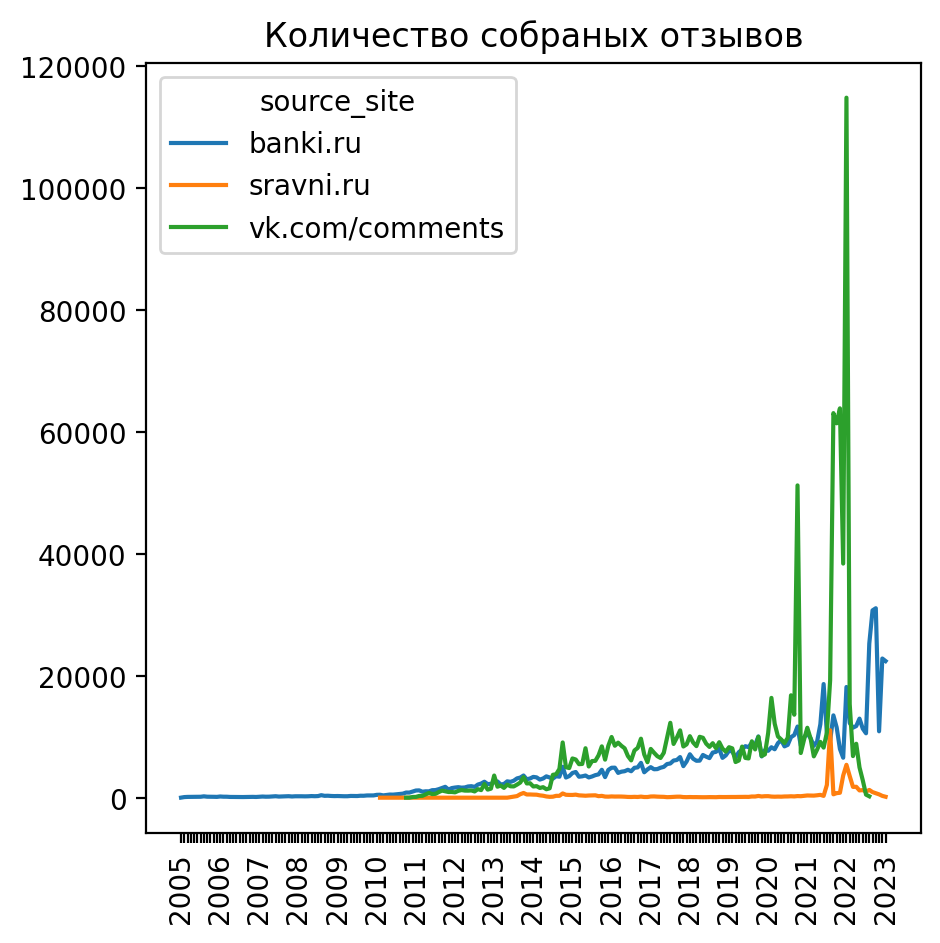

In [10]:
plt.figure(figsize=(5, 5), dpi=200)
sns.lineplot(data=df, x="date", y="count", hue="source_site")
plt.xticks(range(df["date"].nunique()), arr, rotation=90)
plt.title("Количество собраных отзывов")
plt.xlabel(None)
plt.ylabel(None)
plt.savefig(imgs_path + "reviews_count", transparent=True)

# Ethics

In [11]:
params = {
    "bank_ids": [
        1000, # втб
        # 1326, # альфа
        1481, # сбер
        1, # юникредит
        #2673, # тинькофф
    ],
    "model_names": "ethics_model_sentiment_test",
    "source_type": "reviews",
    "aggregate_by_year": True,
    "index_type": "index_safe",
}
data = requests.get("https://ai-service.ethics-hse.ru/views/aggregate_text_result", params=params)
data

<Response [200]>

In [12]:
df = pd.DataFrame(data.json()["items"])
df.head()

,year,quarter,date,bank_name,bank_id,model_name,source_type,index,index_10_percentile,index_90_percentile
0,2005,1,2005-03-01,АО ЮниКредит Банк,1,ethics_model_sentiment_test,reviews,1.582339,0.000000,0.452731
1,2005,1,2005-03-01,Банк ВТБ (ПАО),1000,ethics_model_sentiment_test,reviews,0.000000,0.000000,0.452731
2,2005,1,2005-03-01,ПАО Сбербанк,1481,ethics_model_sentiment_test,reviews,0.001620,0.000000,0.452731
3,2005,2,2005-06-01,АО ЮниКредит Банк,1,ethics_model_sentiment_test,reviews,0.072500,-0.417661,0.452731
4,2005,2,2005-06-01,Банк ВТБ (ПАО),1000,ethics_model_sentiment_test,reviews,0.166332,-0.417661,0.452731


/tmp/ipykernel_17686/2193858969.py:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=df, x="year", y="index", hue="bank_name", errorbar=None, palette=['r', 'b', 'g', 'y'])


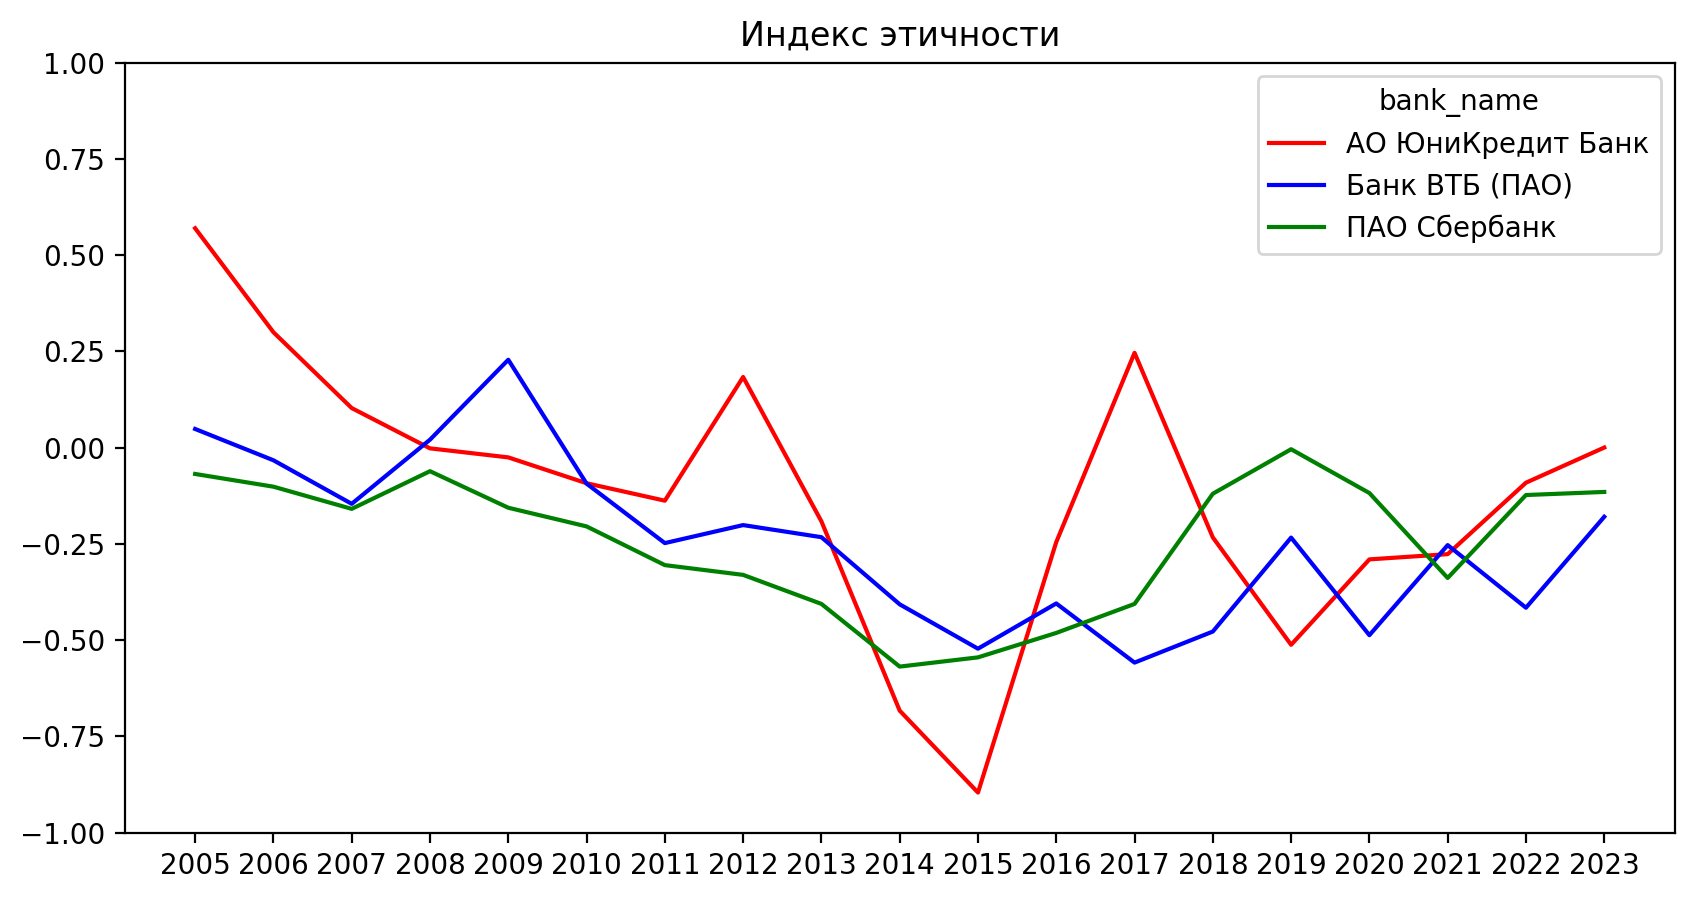

In [14]:
plt.figure(figsize=(10, 5), dpi=200)
# palette=['b', 'g', 'r', 'y']
sns.lineplot(data=df, x="year", y="index", hue="bank_name", errorbar=None, palette=['r', 'b', 'g', 'y'])
plt.xticks(range(2005, 2024))
plt.title(f"Индекс этичности")
plt.xlabel(None)
plt.ylabel(None)
plt.ylim([-1, 1])
plt.savefig(imgs_path + f"ethics_plot_{params['index_type']}", transparent=True)